# Gabe Crawford - Capstone 2

# King County Seattle Housing Price Predictions

In [2]:
#importing the different python modules that ill most likely use
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import folium as fl
import json
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [18]:
#importing the csv file as a dataframe

df_kc = pd.read_csv('kc_house_data.csv')

#this is for the correlation heatmap
df_kc_filt = df_kc[df_kc.columns.difference(['id', 'date', 'lat', 'long'])]
#this is for the OLS regression 
df_kc_filt2 = df_kc[df_kc.columns.difference(['id', 'date','price'])]

df_kc.head() #using head function to check my csv_read function

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

In [3]:
#using describe to show me the descriptive stats on each column
print(df_kc.describe())

                 id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517    

# Issue Tree Breakdown

In [4]:
#Problem Statement:

#As an Real-Estate Investment company, we want to increase our profit by
#10% by purchasing undervalued Real Estate in the King County Area. We will use
#regression on this King County data set to predict how much a house is worth
#assuming our prediction is perfect based on home size, lot size, 
#number of bedrooms, number of bathrooms, the county grade, home condition, 
#and the relationships with different zipcodes. 

###########################################################################

#Sub Issue A: "home size vs. lot size"

#the questions raised will have me looking at sqft_above/sqft_living and it's
#relationship with price, as well as sqft_lot and price. I am predicting that
#the size of the house correlates stronger with price than the size of the lot

#Sub Issue B: "bathrooms vs. bedrooms"

#i will be exploring whether or not the number of bathrooms has a stronger
#relationship to price than the number of bedrooms. My prediction is that 
#bedrooms will have a greater bearing on price, but that they will be close.

#Sub Issue C: "county grade vs. home condition"

#does the condition of the home mean more to a buyer than the county grading
#scale value? do grade and condition correlate with each other? My prediction
#is that they do correlate, but that condition has a stronger relationship with
#the price variable.

#Sub Issue D: "zipcode relationships"

#where is the greatest concentration of homes being bought and sold? Is it the 
#suburbs? or the city center? and where are the most expensive homes located?
#I predict that the most expensive homes are located in the city center and possibly
#around the university campus, and i believe most homes are being bought and sold in 
#the surrounding, more affordably priced, suburban sprawl.


# Data Cleaning

In [5]:
#using info function to check the data types
df_kc.info()

#all of the data types seem correct, this leads me to believe that there are no unwanted characters in any cells

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [6]:
#however, i am going to convert 'zipcode' to a string because the zipcode designates a place not a numerical value
df_kc['zipcode'] = df_kc['zipcode'].astype('str')
df_kc.info() #using info function to check the conversion

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  object 
 17  lat            21613 non-null  float64
 18  long  

In [7]:
#now i will look at how much of the data is null values

df_kc.isna().sum() #makes the sum of the null values

#ok so, no nulls this is a good thing!

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [8]:
#next, i notice that the 'date' column is in weird format,
#a string of numbers followed by 'T000000'?
#it's not very readable

df_kc['date'].head()

0    20141013T000000
1    20141209T000000
2    20150225T000000
3    20141209T000000
4    20150218T000000
Name: date, dtype: object

In [9]:
#here, i remove the 'T000000' from the ends of each string

df_kc['date'] = df_kc['date'].str[:-7]
df_kc.date.head() #with head to check my work

0    20141013
1    20141209
2    20150225
3    20141209
4    20150218
Name: date, dtype: object

In [10]:
#here, i swap the year, or the first 4 characters and add it back as the last 4 characters

df_kc['date'] = df_kc['date'].str[-4:] + df_kc['date'].str[:4]
df_kc['date'].head() #with head to check my work

0    10132014
1    12092014
2    02252015
3    12092014
4    02182015
Name: date, dtype: object

In [11]:
#next, i add a hyphen character between the first 
#two characters, then the next two characters
#this produces a much more readable date string

df_kc['date'] = df_kc['date'].str[0:2] + '-' + df_kc['date'].str[2:4] + '-' + df_kc['date'].str[4:8]
df_kc['date'].head() #with head to check my work

0    10-13-2014
1    12-09-2014
2    02-25-2015
3    12-09-2014
4    02-18-2015
Name: date, dtype: object

In [12]:
#lastly, i convert the string of dates
#to an actual date with pandas
#this way i can mess with it easier

df_kc['date'] = pd.to_datetime(df_kc['date'], format='%m-%d-%Y') #converts the string into datetime
df_kc['date'].head() #with head to check my work

0   2014-10-13
1   2014-12-09
2   2015-02-25
3   2014-12-09
4   2015-02-18
Name: date, dtype: datetime64[ns]

# Descriptive Stats

In [13]:
#here i create a dataframe that focuses on the zipcodes
#i take the mean data for each variable, again based on
#each zipcode.

df_zip = df_kc.groupby('zipcode').aggregate(np.mean)
df_zip.reset_index(inplace=True)
df_zip.head() 

zipcode            id         price  bedrooms  bathrooms  sqft_living  \
0   98001  4.664787e+09  2.808047e+05  3.383978   2.006215  1900.856354   
1   98002  4.850894e+09  2.342840e+05  3.326633   1.839196  1627.743719   
2   98003  4.674182e+09  2.941113e+05  3.357143   2.047321  1928.882143   
3   98004  4.394237e+09  1.355927e+06  3.854890   2.527603  2909.022082   
4   98005  4.961872e+09  8.101649e+05  3.851190   2.424107  2656.803571   

       sqft_lot    floors  waterfront      view  condition     grade  \
0  14937.450276  1.429558    0.000000  0.102210   3.337017  7.295580   
1   7517.633166  1.334171    0.000000  0.010050   3.743719  6.693467   
2  10603.096429  1.310714    0.000000  0.214286   3.371429  7.542857   
3  13104.220820  1.432177    0.003155  0.305994   3.495268  8.687697   
4  19928.785714  1.279762    0.000000  0.095238   3.696429  8.488095   

    sqft_above  sqft_basement     yr_built  yr_renovated        lat  \
0  1721.325967     179.530387  1980.679558     43.801105  47.309020   
1  1522.537688     105.206030  1967.773869     59.889447  47.308780   
2  1663.550000     265.332143  1976.885714     21.360714  47.315741   
3  2419.842271     489.179811  1971.470032    208.145110  47.616183   
4  2160.196429     496.607143  1969.744048     47.630952  47.611532   

         long  sqft_living15    sqft_lot15  
0 -122.270646    1828.856354  11214.403315  
1 -122.213357    1479.030151   7585.482412  
2 -122.310054    1876.196429   9746.178571  
3 -122.205189    2674.700315  12805.022082  
4 -122.167268    2567.863095  18367.773810

In [14]:
#since there are only 70 zipcodes, i am going to 
#create and add a count column to the zipcode dataframe 
#to show the amount of houses in each zipcode region.

df_kc['count'] = 1 #make a count column in the raw DF
zip_count = df_kc.groupby('zipcode').sum() #make a column of zipcode counts
zip_count.reset_index(inplace=True) #reset the index
zip_count = zip_count[['zipcode', 'count']] #make it just the zips and the counts
df_zip = pd.merge(df_zip, zip_count, on='zipcode') #and then add it to the zipcode DF

df_kc.drop(['count'], axis=1, inplace=True) #drop the count column from the raw DF

In [15]:
#using head to check that everything is there

df_zip.head()

zipcode            id         price  bedrooms  bathrooms  sqft_living  \
0   98001  4.664787e+09  2.808047e+05  3.383978   2.006215  1900.856354   
1   98002  4.850894e+09  2.342840e+05  3.326633   1.839196  1627.743719   
2   98003  4.674182e+09  2.941113e+05  3.357143   2.047321  1928.882143   
3   98004  4.394237e+09  1.355927e+06  3.854890   2.527603  2909.022082   
4   98005  4.961872e+09  8.101649e+05  3.851190   2.424107  2656.803571   

       sqft_lot    floors  waterfront      view  ...     grade   sqft_above  \
0  14937.450276  1.429558    0.000000  0.102210  ...  7.295580  1721.325967   
1   7517.633166  1.334171    0.000000  0.010050  ...  6.693467  1522.537688   
2  10603.096429  1.310714    0.000000  0.214286  ...  7.542857  1663.550000   
3  13104.220820  1.432177    0.003155  0.305994  ...  8.687697  2419.842271   
4  19928.785714  1.279762    0.000000  0.095238  ...  8.488095  2160.196429   

   sqft_basement     yr_built  yr_renovated        lat        long  \
0     179.530387  1980.679558     43.801105  47.309020 -122.270646   
1     105.206030  1967.773869     59.889447  47.308780 -122.213357   
2     265.332143  1976.885714     21.360714  47.315741 -122.310054   
3     489.179811  1971.470032    208.145110  47.616183 -122.205189   
4     496.607143  1969.744048     47.630952  47.611532 -122.167268   

   sqft_living15    sqft_lot15  count  
0    1828.856354  11214.403315    362  
1    1479.030151   7585.482412    199  
2    1876.196429   9746.178571    280  
3    2674.700315  12805.022082    317  
4    2567.863095  18367.773810    168  

[5 rows x 21 columns]

In [16]:
#i found some king county GIS data that was easily
#downloadable, i'll use this and folium to build 
#a map to show the relationship between and price
#and location.

gj = open('Zipcodes_for_King_County_and_Surrounding_Area___zipcode_area.geojson')
geoJ = json.load(gj)

In [17]:
type(geoJ) #its a dictionary

dict

In [18]:
geoJ.keys() #taking a look at the keys

dict_keys(['type', 'name', 'crs', 'features'])

In [19]:
geoJ['features'][0] #rummaging about to see what it looks like

{'type': 'Feature',
 'properties': {'Name': None,
  'description': None,
  'OBJECTID': 1,
  'ZIP': 98031,
  'ZIPCODE': '98031',
  'COUNTY': '033',
  'ZIP_TYPE': 'Standard',
  'Shape_Length': 117508.232812751,
  'Shape_Area': 228012907.118483},
 'geometry': {'type': 'Polygon',
  'coordinates': [[[-122.21842289814, 47.4375036472122],
    [-122.21896085951, 47.4375032342973],
    [-122.219575122557, 47.4375027471902],
    [-122.221597705574, 47.437501149099],
    [-122.221599480127, 47.4349568870741],
    [-122.221705161907, 47.4349571562322],
    [-122.223608929569, 47.4349619933269],
    [-122.223734570062, 47.434962098174],
    [-122.225877692641, 47.4349638801293],
    [-122.226123851499, 47.4350841347076],
    [-122.226188630175, 47.4351174488144],
    [-122.226288474562, 47.435165791227],
    [-122.226288612663, 47.4351656661436],
    [-122.226488703707, 47.4349789062814],
    [-122.226613419686, 47.4348631944011],
    [-122.226718881943, 47.4347643871764],
    [-122.226798261749, 4

In [20]:
#creating a new json from the original geojson above
#this way i have just what i need for the map
#below i use a for loop to match only the unique
#zipcodes in the zipcode DF, i put it in a list
#and then put that list in the new cleaned up
#json file.

t_geoJ = geoJ
map_zips = []
for i in range(len(t_geoJ['features'])):
    if t_geoJ['features'][i]['properties']['ZIPCODE'] in list(df_zip['zipcode'].unique()):
        map_zips.append(t_geoJ['features'][i])
        
better_json = dict.fromkeys(['type','features'])
better_json['type'] = 'FeatureCollection'
better_json['features'] = map_zips

open('better_json_geodata.json', 'w').write(json.dumps(better_json, sort_keys=True, indent=4, separators=(',',': ')))

11525626

In [21]:
#now i use the new json to create a folium map to show the relationship 
#between price and location

kc_map = 'better_json_geodata.json' #our cleaned up json file

fm = fl.Map(location=[df_kc['lat'].mean(),df_kc['long'].mean()], zoom_start=9, 
                detect_retina=True, control_scale=False) #the folium map

fl.Choropleth(geo_data=kc_map, data=df_zip, columns=['zipcode', 'price'], 
                  key_on='feature.properties.ZIPCODE', fill_color='PuRd', fill_opacity=0.6,
                 line_opacity=0.2, legend_name='Price & Zipcode').add_to(fm) #folium choropleth map

fl.LayerControl().add_to(fm)
fm.save('capstone2_price_map.html') #saving the map, so i don't lose it
fm #shows the map

In [22]:
#(D.)if you zoom in, you can see the most expensive areas are Medina, Clyde Hill,
#Bellevue, Yarrow Point, Mercer Island, Madison Park, Washington Park and the 
#surrounding areas. This is obviously the city center so its no wonder the prices
#are exorbitant.

In [23]:
#here i copy my code from above and create a map based on the 
#count of houses in the same area.

fm2 = fl.Map(location=[df_kc['lat'].mean(),df_kc['long'].mean()], zoom_start=9, 
                detect_retina=True, control_scale=False) #the folium map

fl.Choropleth(geo_data=kc_map, data=df_zip, columns=['zipcode', 'count'], 
                  key_on='feature.properties.ZIPCODE', fill_color='PuRd', fill_opacity=0.6,
                 line_opacity=0.2, legend_name='House Count & Zipcode').add_to(fm2) #folium choropleth map

fl.LayerControl().add_to(fm2)
fm2.save('capstone2_house_count_map.html') #saving the map, so i don't lose it
fm2 #shows the map

In [24]:
#(D.)this shows that while the expensive houses were in the 
#city center, the bulk of the houses surround the city
#in what i imagine are the main suburbs. With Redmond, 
#Hobart, Maple Valley, and the area right above the 
#University District having the highest concentration
#of houses sold.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69]),
 <a list of 70 Text major ticklabel objects>)

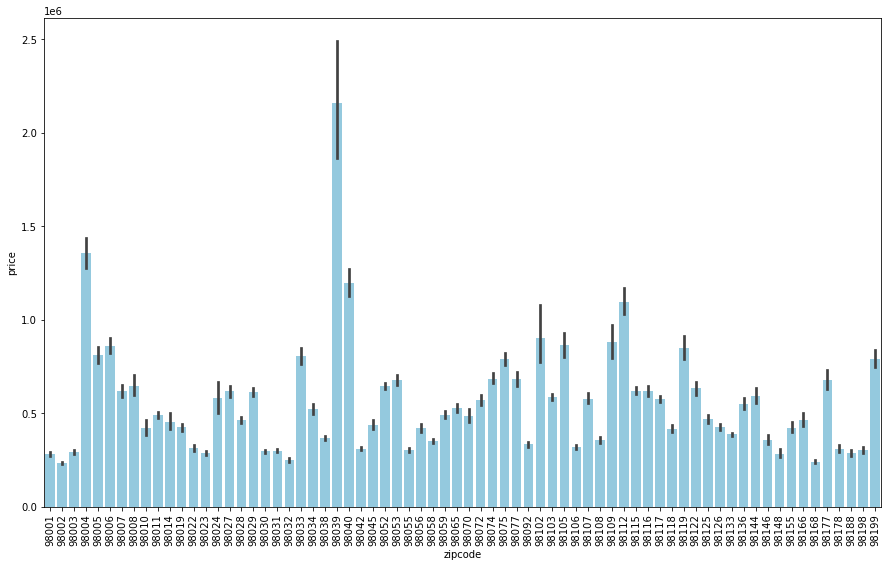

In [25]:
#using a barplot i look at the raw zipcodes to see which to focus on

plt.figure(figsize=(15,9))
sns.barplot(x='zipcode', y='price', data=df_kc, color='skyblue')
plt.xticks(rotation=90)

In [26]:
#above we can see that the most expensive zipcodes are 98039, 98004, 98040, and 98112.
#this allows us to set up focus groups on three different markets, possible investors in the 
#weathier codes, possible homes to invest in the in the middle codes (98119, 98033, 98005, 98006),
#as well as the afforable market in codes 98002, 98001, 98106, and 98168.

# Outliers

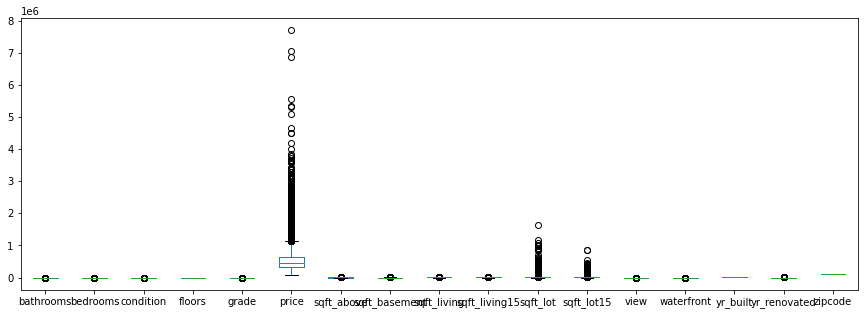

In [23]:
#using a box plot on the entire dataframe
#shows the variables with the most outliers

df_kc_filt.plot(kind='box', figsize=(15,5))
plt.xticks(rotation='45')
plt.show()

#below we see that price, by far, has the highest amount of
#outliers followed by sqft_lot, and sqft_lot15. 

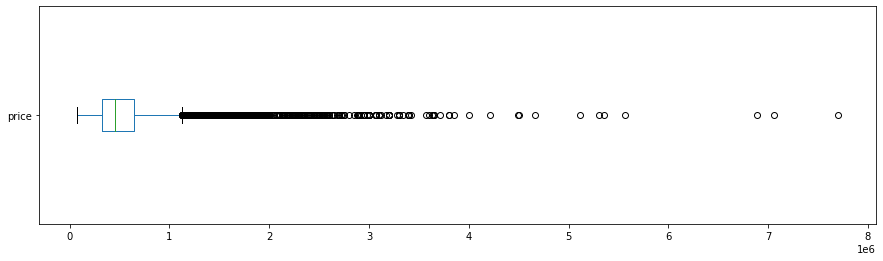

In [24]:
#next lets look at price by itself

df_kc['price'].plot(kind='box', figsize=(15,4), vert=False, )
plt.show()

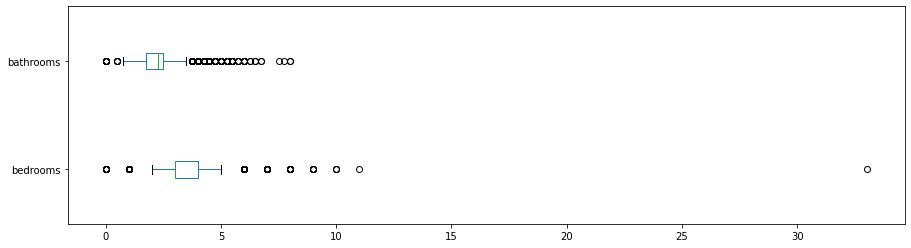

In [25]:
#its hard to see if bedrooms and bathrooms have
#a lot of outliers, so here they are separated 
#from the full chart above

df_kc[['bedrooms', 'bathrooms']].plot(kind='box', figsize=(15,4), vert=False)
plt.show()

In [26]:
#here i remove the most extreme bedroom outliers 
a = df_kc.loc[df_kc['bedrooms'] == 33].index #a 33 room house with 1.75 bathrooms?!

df_kc = df_kc.drop(a)

In [27]:
#here i remove the most extreme bedroom outliers 
b = df_kc.loc[df_kc['bedrooms'] == 0].index #hard to sell a house with no bedrooms.

df_kc = df_kc.drop(b)

mean of price: 540162.1120422242
median of price: 450000.0


Text(0, 0.5, 'count')

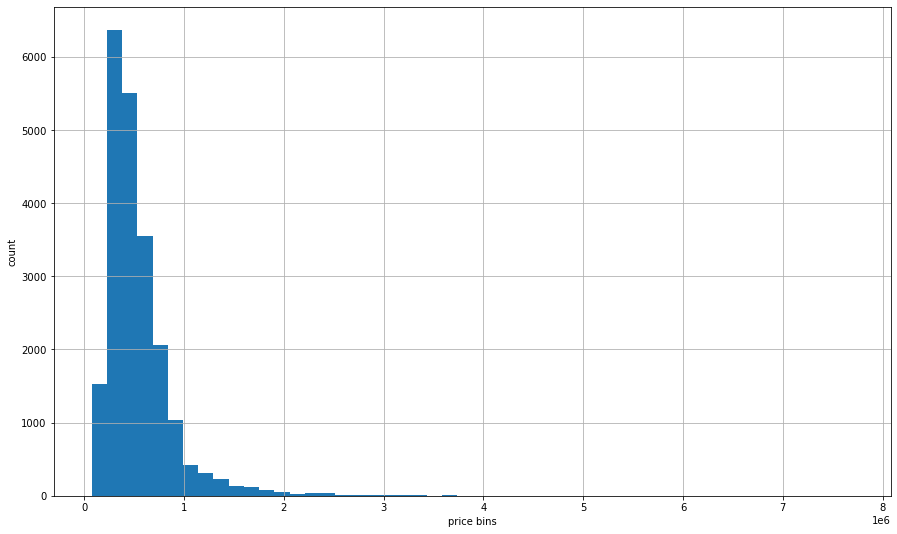

In [28]:
#here is a histogram of just the price, with the outliers
#as well as the mean and median of price.

plt.figure(figsize=(15,9))

print("mean of price: " + str(df_kc['price'].mean()))
print("median of price: " + str(df_kc['price'].median()))

df_kc['price'].hist(bins=50)
plt.xlabel('price bins')
plt.ylabel('count')

In [29]:
#so the price is normal-ish to right skewed, and from the boxplot of just 
#price you can see that there are a huge number of outliers. the Mean is 
#about 540,000$ but the median is 450,000, which tells us that this huge 
#amount of outliers contains many houses priced very very high. Our prediction
#algorithm may tell us that some of these houses could be over-priced.

In [30]:
#here we see the original set before and after
#removing outliers.

q1 = df_kc_filt.quantile(0.25)
q3 = df_kc_filt.quantile(0.75)
iqr = q3 - q1

i = len(df_kc_filt.index)
print("number of entries prior to outlier removal: " + str(i))

outlier_filt = ~((df_kc_filt < q1-1.5*iqr) | (df_kc_filt > q3+1.5*iqr)).any(axis=1)
df_ol_filt = df_kc_filt[outlier_filt] #this is the outlier removed datafram
i_f = len(df_ol_filt.index)
print("number of entries following outlier removal: " + str(i_f))

number of entries prior to outlier removal: 21613
number of entries following outlier removal: 15071


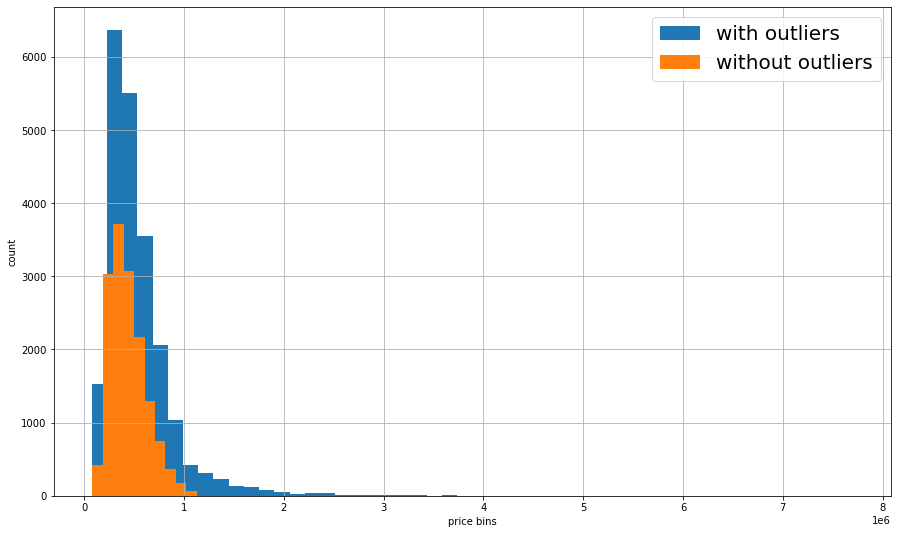

In [31]:
#here is a histogram of just the price, with price
#without the outliers placed over it to show the 
#difference in shapes.

plt.figure(figsize=(15,9))

df_kc['price'].hist(bins=50, label='with outliers')
df_ol_filt['price'].hist(bins=10, label='without outliers')
plt.xlabel('price bins')
plt.ylabel('count')
plt.legend(prop={'size':20})

In [32]:
#above, in the orange is the price without outliers, it is 
#even more right skewed, and much smaller, i am beginning
#to think removing outliers is not a good idea.

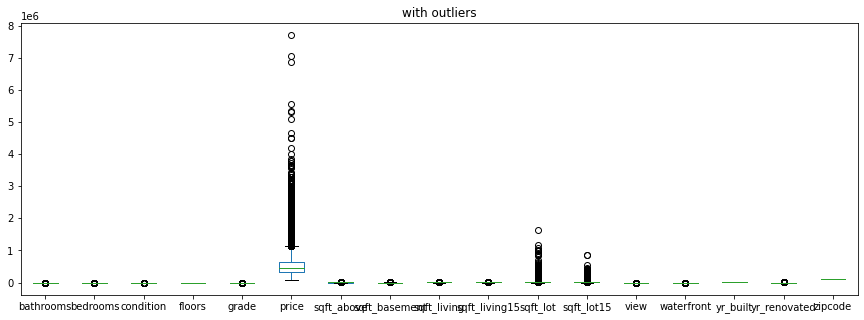

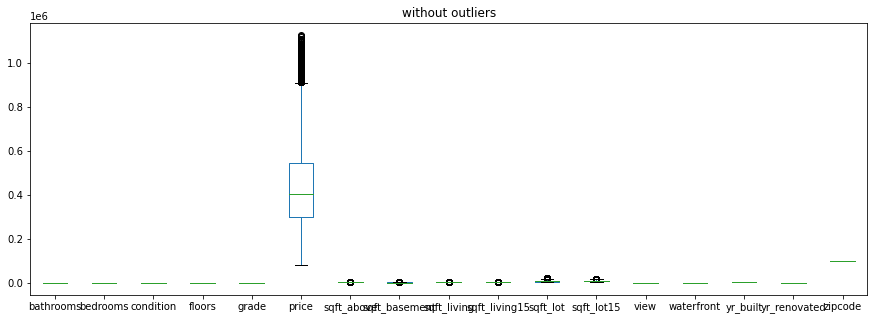

In [33]:
#now lets compare the box plots from earlier

df_kc_filt.plot(kind='box', figsize=(15,5), title='with outliers')
df_ol_filt.plot(kind='box', figsize=(15,5), title='without outliers')
plt.xticks(rotation='45')
plt.show()

In [34]:
#there is a drastic change in the box shape of the price variable
#this can also be seen in the histograms above as well. In order
#to have a stronger prediction algorithm we will not be removing
#outliers, the change is too dramatic.

# Inferential Stats

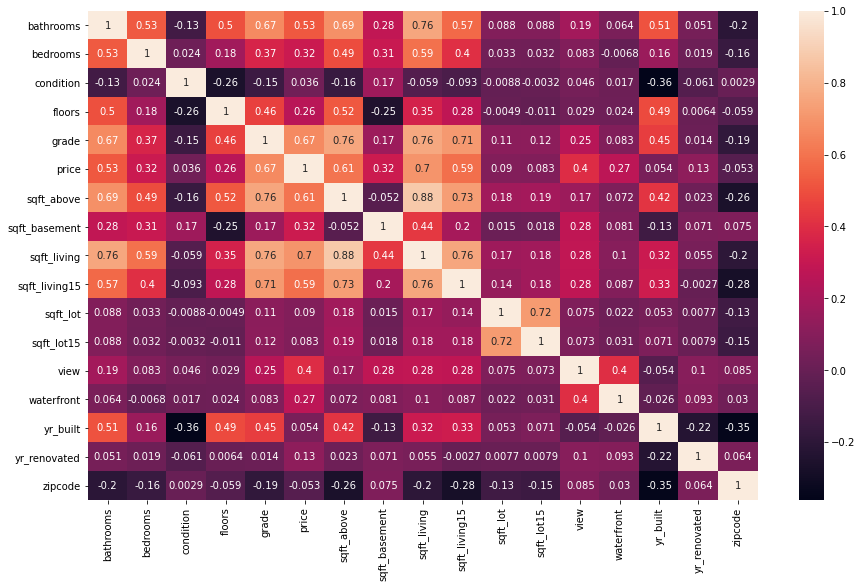

In [8]:
#here i use seaborn to create a heatmap 
#to show the correlations between the
#various columns

df_corr = df_kc_filt.corr() #reference above, dataframe specifically for the heatmap

fig, ax = plt.subplots(figsize=(15,9)) #this fixes the size of the entire plot
sns.heatmap(df_corr, annot=True) #this actually plots the map

#just from this you can see the lighter colored 
#boxes are where there are strong relationships 
#between different columns

                  price
sqft_living    0.701922
grade          0.667777
sqft_above     0.605422
sqft_living15  0.585315
bathrooms      0.525883
view           0.397331
sqft_basement  0.323811
bedrooms       0.316058
waterfront     0.266434
floors         0.256893
yr_renovated   0.126432
sqft_lot       0.089830
sqft_lot15     0.082756
yr_built       0.054030
condition      0.036095
zipcode       -0.053354


[]

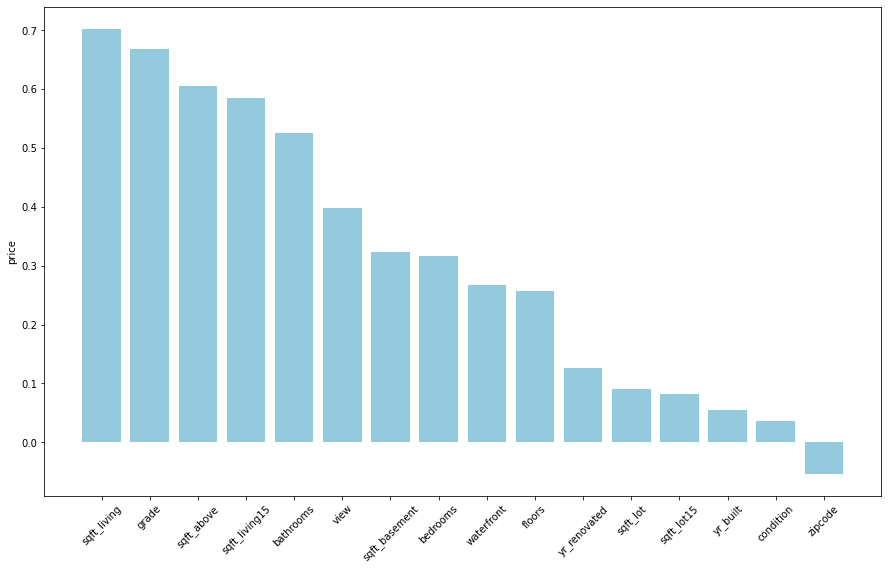

In [9]:
#here we create a barplot to show an ordered list of the variables
#showing the strongest correlations to the price variable

row = df_corr.loc[:,['price']]
row = row.sort_values(by='price', ascending=False).drop('price')

plt.figure(figsize=(15,9))

print(row)

sns.barplot(data=row, x=row.index, y='price', color='skyblue')
plt.xticks(rotation='45')
plt.plot()

In [10]:
#here it is much easier to see the strongest relationships are
#sqft_living, grade, sqft_above, sqft_living15, bathrooms. Then
#there is a big drop from bathrooms to view. Our insights are this:
#our prediction algorithm will be strong in relation to our top 5
#predictors, home size, county grade, number of bathrooms and etc.

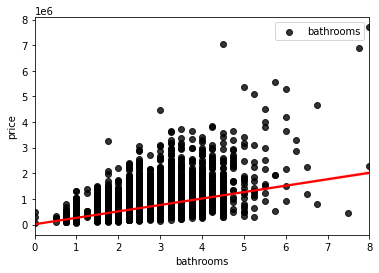

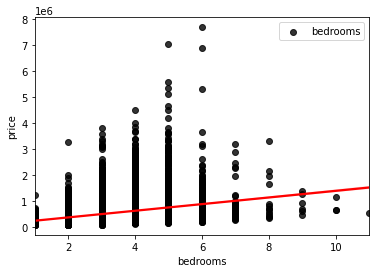

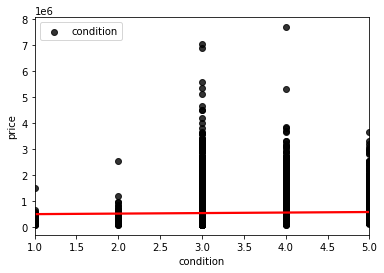

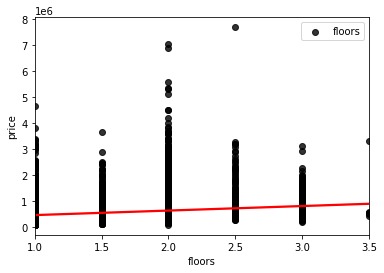

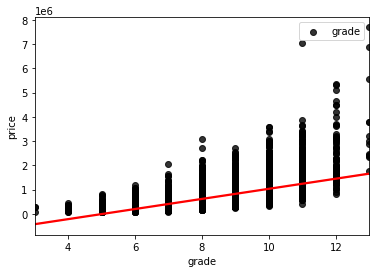

price vs. price is just 1:1


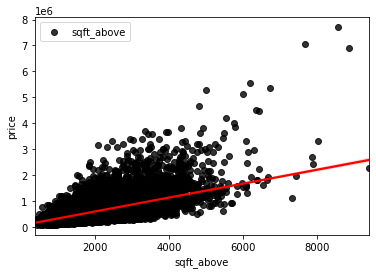

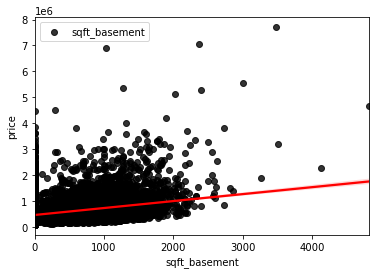

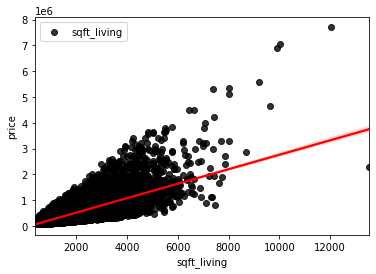

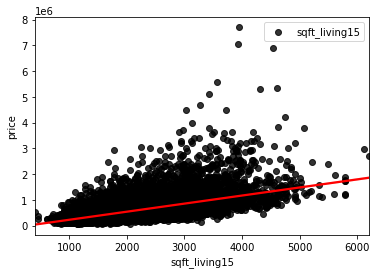

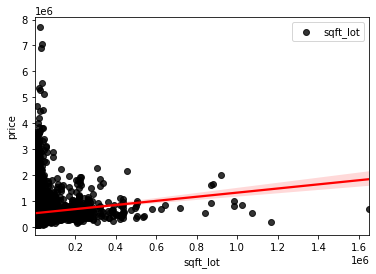

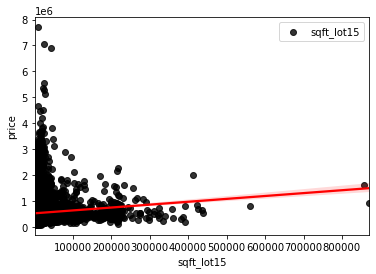

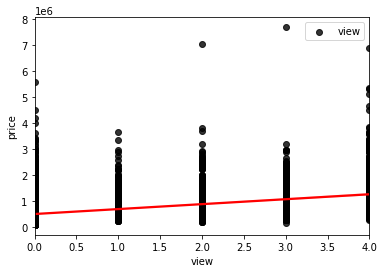

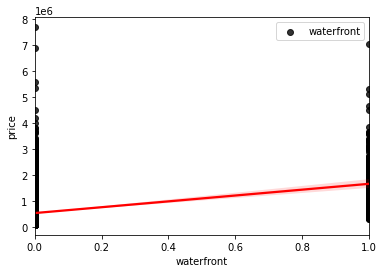

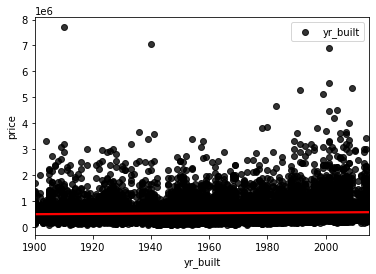

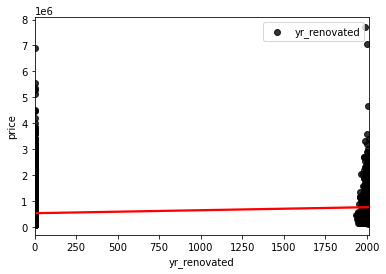

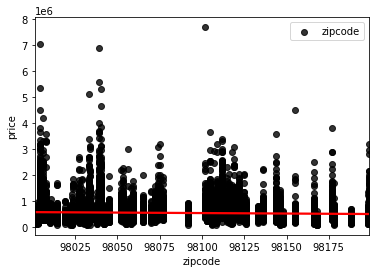

In [11]:
#here we iterate through all of our predictors against price and we add a line
#of best fit to see if the relationship is positive or negative.

header = list(df_kc_filt) #an iterable

for column in header: #for loop for making plots
    if column == 'price':
        print("price vs. price is just 1:1") #remove price on the x
    else:
        sns.regplot(x=column, y='price', 
                   data=df_kc_filt, label=column,
                   scatter_kws={"color": "black"},
                   line_kws={"color":"red"})
        plt.legend()
        plt.show()

# OLS Regression Modeling

In [19]:
#here we use ols regression with all variables and outliers (excluding id, and date)

X = df_kc_filt2 #reference above, dataframe specifically made for OLF
y = df_kc_filt['price']

X = sm.add_constant(X)
#note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) #make the predictions by the model

#print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     2960.
Date:                Sat, 09 Jan 2021   Prob (F-statistic):               0.00
Time:                        14:44:22   Log-Likelihood:            -2.9460e+05
No. Observations:               21613   AIC:                         5.892e+05
Df Residuals:                   21595   BIC:                         5.894e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           6.69e+06   2.93e+06      2.282      0.022    9.44e+05    1.24e+07
bathrooms      4.114e+04   3253.678     12.645      0.000    3.48e+04    4.75e+04
bedrooms      -3.577e+04   1891.843    -18.906      0.000   -3.95e+04   -3.21e+04
condition      2.639e+04   2351.461     11.221      0.000    2.18e+04     3.1e+04
floors         6689.5501   3595.859      1.860      0.063    -358.599    1.37e+04
grade          9.589e+04   2152.789     44.542      0.000    9.17e+04       1e+05
lat            6.027e+05   1.07e+04     56.149      0.000    5.82e+05    6.24e+05
long          -2.147e+05   1.31e+04    -16.349      0.000    -2.4e+05   -1.89e+05
sqft_above       70.7853      2.253     31.412      0.000      66.368      75.202
sqft_basement    39.6577      2.646     14.985      0.000      34.470      44.845
sqft_living     110.4428      2.270     48.661      0.000     105.994     114.891
sqft_living15    21.6814      3.448      6.289      0.000      14.924      28.439
sqft_lot          0.1286      0.048      2.683      0.007       0.035       0.223
sqft_lot15       -0.3826      0.073     -5.222      0.000      -0.526      -0.239
view           5.287e+04   2140.055     24.705      0.000    4.87e+04    5.71e+04
waterfront      5.83e+05   1.74e+04     33.580      0.000    5.49e+05    6.17e+05
yr_built      -2620.2232     72.659    -36.062      0.000   -2762.640   -2477.806
yr_renovated     19.8126      3.656      5.420      0.000      12.647      26.978
zipcode        -582.4199     32.986    -17.657      0.000    -647.074    -517.765
==============================================================================
Omnibus:                    18384.201   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1868224.491
Skew:                           3.566   Prob(JB):                         0.00
Kurtosis:                      47.985   Cond. No.                     5.17e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.19e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
#with an r-squared of 0.70, i feel pretty confident that the coefficients
#in this model explain the movements of the price per variable the best
#many insights can be drawn that are about 70% true: for every sqft_lving
#the price increases by 110.44$, for every increase in the county grade 
#value the price increases by 95,890$, this means, for example, that a 
#grade 5 house could get 10,000$ of renovation, get a new grade, and 
#even if the grade only increases from 5 to 6, almost 100,000$ could made
#back on that 10,000$ investment. 

#notice too, that the p-values for almost all the variables (except floors),
#are way below 0.05, this means that all of our variables are statistically
#significant.

In [37]:
#here we use ols regression again 
#and focus on specific variables, 
#excluding id, and date, but 
#including outliers

#as you have seen above, i take the top 5 strongest correlated variables,
#as well as 'bedrooms', and i will now model again with this focus
X1 = df_kc_filt[['sqft_living', 'sqft_above', 'sqft_living15', 'bathrooms', 'bedrooms', 'grade']]
y1 = df_kc_filt['price']

X1 = sm.add_constant(X1)
#note the difference in argument order
model1 = sm.OLS(y1, X1).fit()
predictions1 = model1.predict(X) #make the predictions by the model

#print out the statistics
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.551
Method:                 Least Squares   F-statistic:                     4415.
Date:                Sat, 09 Jan 2021   Prob (F-statistic):               0.00
Time:                        16:19:35   Log-Likelihood:            -2.9896e+05
No. Observations:               21613   AIC:                         5.979e+05
Df Residuals:                   21606   BIC:                         5.980e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -5.26e+05    1.5e+04    -34.980      0.000   -5.55e+05   -4.97e+05
sqft_living     271.3995      4.723     57.468      0.000     262.143     280.656
sqft_above      -82.8234      4.425    -18.719      0.000     -91.496     -74.151
sqft_living15    21.6711      3.998      5.420      0.000      13.834      29.508
bathrooms     -2.383e+04   3463.178     -6.881      0.000   -3.06e+04    -1.7e+04
bedrooms      -4.044e+04   2273.612    -17.787      0.000   -4.49e+04    -3.6e+04
grade          1.036e+05   2479.739     41.786      0.000    9.88e+04    1.08e+05
==============================================================================
Omnibus:                    16814.356   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1005508.666
Skew:                           3.251   Prob(JB):                         0.00
Kurtosis:                      35.776   Cond. No.                     3.30e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.3e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#here we see the r-square value drop pretty significantly
#from the original set at 0.7 to 0.55, our coefficients for
#sqft_living and grade increased but are only good about 55%
#of the time, lets try one more time with the outliers removed
#lets see below.

In [38]:
#here we use ols regression a third
#time and focus on our specific variables, 
#as well as exluding id, date, and outliers

#as you have seen above, i take the top 5 strongest correlated variables,
#as well as 'bedrooms', and i will now model again with this focus
X2 = df_ol_filt[['sqft_living', 'sqft_above', 'sqft_living15', 'bathrooms', 'bedrooms', 'grade']]
y2 = df_ol_filt['price']

X2 = sm.add_constant(X2)
#note the difference in argument order
model2 = sm.OLS(y2, X2).fit()
predictions2 = model2.predict(X) #make the predictions by the model

#print out the statistics
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.361
Method:                 Least Squares   F-statistic:                     1421.
Date:                Sat, 09 Jan 2021   Prob (F-statistic):               0.00
Time:                        16:19:41   Log-Likelihood:            -2.0036e+05
No. Observations:               15071   AIC:                         4.007e+05
Df Residuals:                   15064   BIC:                         4.008e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3.066e+05   1.32e+04    -23.286      0.000   -3.32e+05   -2.81e+05
sqft_living     152.5454      4.276     35.675      0.000     144.164     160.927
sqft_above      -70.8797      3.742    -18.942      0.000     -78.214     -63.545
sqft_living15    31.6470      3.597      8.799      0.000      24.597      38.697
bathrooms     -3.005e+04   2567.937    -11.702      0.000   -3.51e+04    -2.5e+04
bedrooms      -1.504e+04   1957.666     -7.684      0.000   -1.89e+04   -1.12e+04
grade          8.559e+04   2093.124     40.891      0.000    8.15e+04    8.97e+04
==============================================================================
Omnibus:                     1023.997   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1297.623
Skew:                           0.638   Prob(JB):                    1.68e-282
Kurtosis:                       3.664   Cond. No.                     3.57e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.57e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#yeah here we see the r-square drop significantly again from 0.55 
#to 0.36, and there isn't much change in our coefficients. 

#my conclusion is that keeping all the variables and outliers 
#produces a stronger r-square value which means our predicted
#prices will be 70% accurate and we are assuming perfection
#so the first model is what we should build the price prediction
#algorithm from.

# Insights and Conclusions

In [ ]:
###########################################################################

#Sub Issue A: "home size vs. lot size"

#from our prediction models above, home size has a much larger coefficient value,
#and from our scatter chart sqft_living has a stronger regression line than sqft_lot.
#actionable insights can be drawn from this: we can use this 110.44$ value from the first
#prediction model to predict if certain homes are under or over valued. we can also predict
#how much money making additions to a home will cost and whether or not it will be 
#profitable to make additions in the first place.

#Sub Issue B: "bathrooms vs. bedrooms"

#drawn from the first prediction model, having too many bedrooms can 
#bring the value of the home down, even though in the scatter charts above
#both bedrooms and bathrooms have strongish positive regression lines. my 
#business insights from the prediction model tell me to look for homes with
#1 or 2 bedrooms and 2 or more bathrooms. For homes with 3 or more bedrooms,
#value could be added to the house by converting an extra bedroom to a new
#bathroom, or cutting the size of bedroom by adding a bathroom to it. Any 
#addition of a bathroom adds 41,140$ to a home based on our model.

#Sub Issue C: "county grade vs. home condition"

#as i mentioned above, its very surprising that for every increase in 
#county grade there is an almost 100,000$ increase in the value of a 
#home. the same goes for condition at a little over 25,000$ increase for
#every 1 increase in condition, this means that a home that has a middle or
#low grade/condition with an extra 10-15K investment stands to increase its 
#grade and condition, and even if it is by 1 each, thats a profit of 100,000-
#105,000$. I suggest we focus in on homes that have middle to low-middle
#grade/condition values.

#Sub Issue D: "zipcode relationships"

#we found that the most expensive houses where located in the city
#center and right below the university area. whereas the highest 
#concentration of houses being bought and sold are located in the
#surrounding suburban sprawl, especially concentrated in the North
#Western sections, as well as the center North above the University 
#area. Those are the areas we can concentrate our buying on.
